# Questão 2  - Solução de sistemas de equações não lineares

<img src="questao2.png" alt="Questao 2" width="500">

### Bibliotecas utilizadas

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### Definindo o vetor das equações não lineares

As equações do sistema são:
\begin{cases}
f_1(x, y) = x^2 + xy - 10 \\
f_2(x, y) = y + 3xy^2 - 57
\end{cases}

Logo,
\begin{bmatrix}
x^2 + xy - 10 \\
y + 3xy^2 - 57
\end{bmatrix}

In [36]:
def F(X):
    x, y = X
    f1 = x**2 + x*y - 10
    f2 = y + 3*x*(y**2) - 57
    return np.array([f1, f2])

### Definindo a matriz Jacobiana

Ela é formada pelas derivadas parciais de primeira ordem das equações do sistema        
\begin{cases}
\frac{\partial f_1}{\partial x} = 2x + y \\
\frac{\partial f_1}{\partial y} = x \\
\frac{\partial f_2}{\partial x} = 3y^2 \\
\frac{\partial f_2}{\partial y} = 1 + 6xy
\end{cases}

Logo, a Jacobiana é:
\begin{bmatrix}
2x + y & x \\
3y^2 & 1 + 6xy
\end{bmatrix}

In [37]:
def J(X):
    x, y = X
    df1dx = 2*x + y
    df1dy = x
    df2dx = 3*(y**2)
    df2dy = 1 + 6*x*y
    return np.array([[df1dx, df1dy],
                     [df2dx, df2dy]])

### Parâmetros iniciais

In [38]:
X = np.array([10.0, 10.0]) # Vetor inicial [x0, y0]
tol = 1e-5                 # Tolerancia
Nmax = 20                  # Numero maximo de iteracoes

### Definindo a função para resolver os sistemas lineares que usaremos

In [39]:
def eliminacao_gauss(A, B):
    # Copias para nao alterar originais
    A = [row.copy() for row in A]
    B = [[b] if isinstance(b, (int, float)) else b.copy() for b in B]
    n = len(A)

    # Matriz aumentada
    for i in range(n):
        A[i].append(B[i][0])

    # Eliminacao direta
    for i in range(n):
        piv = A[i][i]
        if abs(piv) < 1e-12:
            raise ValueError(f"Pivo zero detectado na linha {i}")
        for j in range(i, n+1):
            A[i][j] /= piv
        for k in range(i+1, n):
            fator = A[k][i]
            for j in range(i, n+1):
                A[k][j] -= fator * A[i][j]

    # Substituicao regressiva
    Xsol = [0] * n
    for i in range(n-1, -1, -1):
        Xsol[i] = A[i][n]
        for j in range(i+1, n):
            Xsol[i] -= A[i][j] * Xsol[j]

    return np.array(Xsol)

### Loop iterativo do Método de Newton-Raphson

In [40]:
iteracoes = [X.copy()]  # armazena os vetores de cada iteracao

print(f"| {'Iter':>4} | {'x':>12} | {'y':>12} | {'Δx':>13} | {'Δy':>13} |")
print("=" * 70)

for k in range(Nmax):
    Fx = F(X)
    Jx = J(X)

    delta = eliminacao_gauss(Jx.tolist(), (-Fx).tolist())

    X = X + delta               # Atualiza o vetor de incognitas: X_{k+1} = X_k + ΔX
    iteracoes.append(X.copy() ) # Armazena X para analise posterior (grafico)

    print(
        f"| {k+1:4d} | {X[0]:+12.6f} | {X[1]:+12.6f} | {delta[0]:+12.6e} | {delta[1]:+12.6e} |")

    # Se Δx e Δy < tol, o metodo converge e o loop eh interrompido.
    if abs(delta[0]) < tol and abs(delta[1]) < tol:
        print(f"Convergência alcançada na iteração {k+1}")
        break

# Aviso se o criterio de convergencia não for atingido apos Nmax iteracoes.
else:
    print("Número máximo de iterações atingido sem convergência.")

| Iter |            x |            y |            Δx |            Δy |
|    1 |    +4.367265 |    +7.898204 | -5.632735e+00 | -2.101796e+00 |
|    2 |    +2.207564 |    +6.147722 | -2.159701e+00 | -1.750482e+00 |
|    3 |    +1.795235 |    +4.295245 | -4.123288e-01 | -1.852477e+00 |
|    4 |    +1.940174 |    +3.138409 | +1.449390e-01 | -1.156836e+00 |
|    5 |    +1.999530 |    +2.999278 | +5.935546e-02 | -1.391309e-01 |
|    6 |    +2.000000 |    +3.000000 | +4.703776e-04 | +7.217942e-04 |
|    7 |    +2.000000 |    +3.000000 | -1.110758e-08 | -2.415089e-07 |
Convergência alcançada na iteração 7


### Resultados finais

In [41]:
print("\nVetor solução (raízes encontradas):")
print(f"x = {X[0]:.6f}, y = {X[1]:.6f}")

Fx_final = F(X)

print("\nValores das funções em (x, y):")
print(f"f1(x,y) = {Fx_final[0]:.6e}")
print(f"f2(x,y) = {Fx_final[1]:.6e}")


Vetor solução (raízes encontradas):
x = 2.000000, y = 3.000000

Valores das funções em (x, y):
f1(x,y) = 3.552714e-15
f2(x,y) = 4.050094e-13


### Gráfico da evolução das iterações

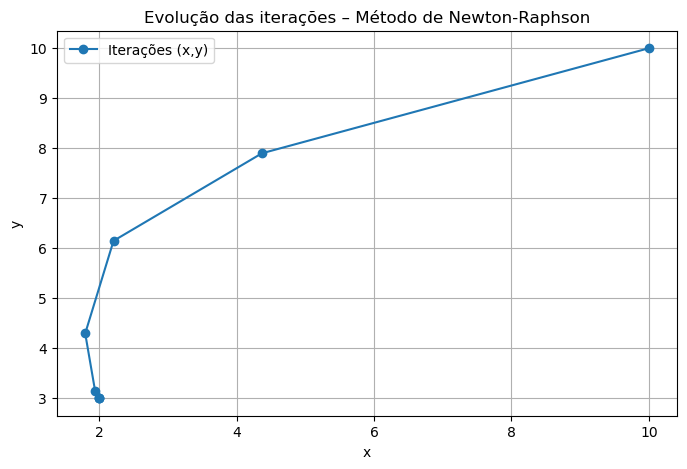

In [42]:
iteracoes = np.array(iteracoes)
plt.figure(figsize=(8, 5))
plt.plot(iteracoes[:, 0], iteracoes[:, 1], 'o-', label='Iterações (x,y)')
plt.title('Evolução das iterações – Método de Newton-Raphson')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()